 7016A CW1

Libraries

In [32]:
import soundfile as sf
import sounddevice as sd
import matplotlib.pyplot as plt
import numpy as np

# Coversion and labelling

In [33]:
import os
from pathlib import Path
from pydub import AudioSegment

root_source_folder = Path('/Users/sudiptogoldfish/code files/CMP7016A LAB/Vocabulary MOV/')
root_output_folder = Path('/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Vocabulary/')

# Adding FFmpeg path
os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin"

# Ensure the root output folder exists
root_output_folder.mkdir(parents=True, exist_ok=True)

print(f"Source folder: {root_source_folder}")
print(f"Output folder: {root_output_folder}")
print("-" * 50)

# Recursively find all MOV files
mov_files = root_source_folder.glob('**/*.MOV')

conversion_count = 0

for mov_path in mov_files:
    # Get the relative path (e.g., 'Ahmed/ahmed01.MOV') from the root source
    relative_path = mov_path.relative_to(root_source_folder)

    relative_dir = relative_path.parent

    # Define the final output folder path (e.g., /Converted_WAVs/Ahmed)
    output_subfolder = root_output_folder / relative_dir

    # Create the output subfolder if it doesn't exist
    output_subfolder.mkdir(parents=True, exist_ok=True)

    # Define the final WAV file path
    wav_filename = mov_path.stem + '.wav'
    wav_path = output_subfolder / wav_filename

    if wav_path.exists():
        print(f"Skipping: {relative_path} (WAV already exists in output)")
        continue

    try:
        print(f"Converting: {relative_path} -> {wav_path.relative_to(root_output_folder)}...")
        audio = AudioSegment.from_file(mov_path, format="mov")

        audio.export(
            wav_path,
            format="wav",
            parameters=["-acodec", "pcm_s16le", "-ar", "44100"]
        )

        print(f"✅ Success! Saved to: {wav_path.name}")
        conversion_count += 1

    except Exception as e:
        print(f"❌ Failed to convert {mov_path.name}. Error: {e}")

print(f"Conversion complete. {conversion_count} new WAV files generated in {root_output_folder}.")

Source folder: /Users/sudiptogoldfish/code files/CMP7016A LAB/Vocabulary MOV
Output folder: /Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Vocabulary
--------------------------------------------------
Skipping: Vyom/vyom17.MOV (WAV already exists in output)
Skipping: Vyom/vyom03.MOV (WAV already exists in output)
Skipping: Vyom/vyom02.MOV (WAV already exists in output)
Skipping: Vyom/vyom16.MOV (WAV already exists in output)
Skipping: Vyom/vyom14.MOV (WAV already exists in output)
Skipping: Vyom/vyom15.MOV (WAV already exists in output)
Skipping: Vyom/vyom01.MOV (WAV already exists in output)
Skipping: Vyom/vyom05.MOV (WAV already exists in output)
Skipping: Vyom/vyom11.MOV (WAV already exists in output)
Skipping: Vyom/vyom10.MOV (WAV already exists in output)
Skipping: Vyom/vyom04.MOV (WAV already exists in output)
Skipping: Vyom/vyom12.MOV (WAV already exists in output)
Skipping: Vyom/vyom06.MOV (WAV already exists in output)
Skipping: Vyom/vyom07.MOV (WAV already exists in outpu

Converting Samplerate to 16k Hz

In [3]:
import soundfile as sf
from pathlib import Path
import numpy as np
from scipy.signal import resample_poly

TARGET_SR = 16000
folder_path = Path('/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Vocabulary/')
OUTPUT_DIR = folder_path.parent / (folder_path.name + '_16khz')

OUTPUT_DIR.mkdir(exist_ok=True)
print(f"Starting batch resampling to {TARGET_SR}Hz. Output: {OUTPUT_DIR}")

for file_path in folder_path.glob('**/*.wav'):
    relative_path = file_path.relative_to(folder_path)
    p_out = OUTPUT_DIR / relative_path
    data, sr_orig = sf.read(file_path, dtype='float32')

    # Convert stereo to mono (if necessary)
    if data.ndim > 1:
        data = data[:, 0]

    resampled_data = data

    # Resample if necessary using high-quality polyphase filter
    if sr_orig != TARGET_SR:
        gcd_val = np.gcd(sr_orig, TARGET_SR)
        up, down = TARGET_SR // gcd_val, sr_orig // gcd_val

        resampled_data = resample_poly(data, up, down)
        print(f"Resampled: {relative_path} ({sr_orig}Hz -> {TARGET_SR}Hz)")
    else:
        print(f"Skipped: {relative_path} (Already {TARGET_SR}Hz)")

    # Create necessary subdirectories and save the file
    p_out.parent.mkdir(parents=True, exist_ok=True)
    sf.write(p_out, resampled_data, TARGET_SR)

print("\nBatch processing complete.")

Starting batch resampling to 16000Hz. Output: /Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Vocabulary_16khz
Resampled: Vyom/vyom08.wav (44100Hz -> 16000Hz)
Resampled: Vyom/vyom20.wav (44100Hz -> 16000Hz)
Resampled: Vyom/vyom09.wav (44100Hz -> 16000Hz)
Resampled: Vyom/vyom19.wav (44100Hz -> 16000Hz)
Resampled: Vyom/vyom18.wav (44100Hz -> 16000Hz)
Resampled: Vyom/vyom01.wav (44100Hz -> 16000Hz)
Resampled: Vyom/vyom15.wav (44100Hz -> 16000Hz)
Resampled: Vyom/vyom14.wav (44100Hz -> 16000Hz)
Resampled: Vyom/vyom16.wav (44100Hz -> 16000Hz)
Resampled: Vyom/vyom02.wav (44100Hz -> 16000Hz)
Resampled: Vyom/vyom03.wav (44100Hz -> 16000Hz)
Resampled: Vyom/vyom17.wav (44100Hz -> 16000Hz)
Resampled: Vyom/vyom13.wav (44100Hz -> 16000Hz)
Resampled: Vyom/vyom07.wav (44100Hz -> 16000Hz)
Resampled: Vyom/vyom06.wav (44100Hz -> 16000Hz)
Resampled: Vyom/vyom12.wav (44100Hz -> 16000Hz)
Resampled: Vyom/vyom04.wav (44100Hz -> 16000Hz)
Resampled: Vyom/vyom10.wav (44100Hz -> 16000Hz)
Resampled: Vyom/vyom11

Check samplerate

In [4]:
import soundfile as sf
from pathlib import Path

file_to_check = Path('/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Vocabulary_16khz/Josh/josh04.wav')
sr = sf.read(file_to_check)
print(f"File: {file_to_check.name}")
print(f"Samplerate: {sr}Hz")

File: josh04.wav
Samplerate: (array([6.10351562e-05, 1.52587891e-04, 6.10351562e-05, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00], shape=(15953,)), 16000)Hz


Labelling

In [7]:
from collections import defaultdict
from pathlib import Path

# Set the base directory to scan
BASE_DIR = Path('/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Vocabulary_16khz/')
name_files = defaultdict(list)

# Scan all .wav files recursively
for file_path in BASE_DIR.glob('**/*.wav'):
    label = file_path.parent.name
    name_files[label].append(file_path.name)

# Print summary
for name in sorted(name_files):
    files = name_files[name]
    count = len(files)

    print(f"\n{name}: {count} files")
    print(f", ".join(sorted(files)))



Ahmed: 20 files
ahmed01.wav, ahmed02.wav, ahmed03.wav, ahmed04.wav, ahmed05.wav, ahmed06.wav, ahmed07.wav, ahmed08.wav, ahmed09.wav, ahmed10.wav, ahmed11.wav, ahmed12.wav, ahmed13.wav, ahmed14.wav, ahmed15.wav, ahmed16.wav, ahmed17.wav, ahmed18.wav, ahmed19.wav, ahmed20.wav

Amber : 20 files
amber01.wav, amber02.wav, amber03.wav, amber04.wav, amber05.wav, amber06.wav, amber07.wav, amber08.wav, amber09.wav, amber10.wav, amber11.wav, amber12.wav, amber13.wav, amber14.wav, amber15.wav, amber16.wav, amber17.wav, amber18.wav, amber19.wav, amber20.wav

Charlie: 20 files
charlie01.wav, charlie02.wav, charlie03.wav, charlie04.wav, charlie05.wav, charlie06.wav, charlie07.wav, charlie08.wav, charlie09.wav, charlie10.wav, charlie11.wav, charlie12.wav, charlie13.wav, charlie14.wav, charlie15.wav, charlie16.wav, charlie17.wav, charlie18.wav, charlie19.wav, charlie20.wav

Christopher: 20 files
christopher01.wav, christopher02.wav, christopher03.wav, christopher04.wav, christopher05.wav, christopher

# Play wav file

In [34]:
import simpleaudio as sa

file_path = Path('/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Vocabulary/Charlie/charlie07.wav')

audio_data_int, sr = sf.read(file_path, dtype='float32')

print(f"▶️Playing: {file_path.name}")

play_obj = sa.play_buffer(
    audio_data_int.tobytes(),
    num_channels=audio_data_int.ndim if audio_data_int.ndim > 1 else 1,
    bytes_per_sample=4, #float32 uses 2 bytes
    sample_rate=sr
)

▶️Playing: charlie07.wav


# Samplerate and plotting spectrogram (x-axis/Time(s), y-axis/Frequency(Hz))

File: charlie07.wav
Sample Rate (Fs): 44100 Hz


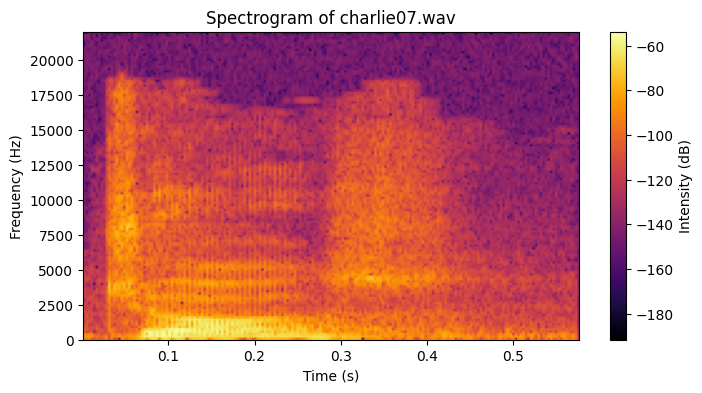

In [10]:
import matplotlib.pyplot as plt

# Sample rate
print(f"File: {Path(file_path).name}")
print(f"Sample Rate (Fs): {sr} Hz")

if data.ndim > 1:
    data_mono = data[:, 0]
else:
    data_mono = data

plt.figure(figsize=(8, 4))
plt.specgram(data_mono, Fs=sr, cmap='inferno')

plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title(f"Spectrogram of {Path(file_path).name}")
plt.colorbar(label='Intensity (dB)')
plt.show()

Waveform

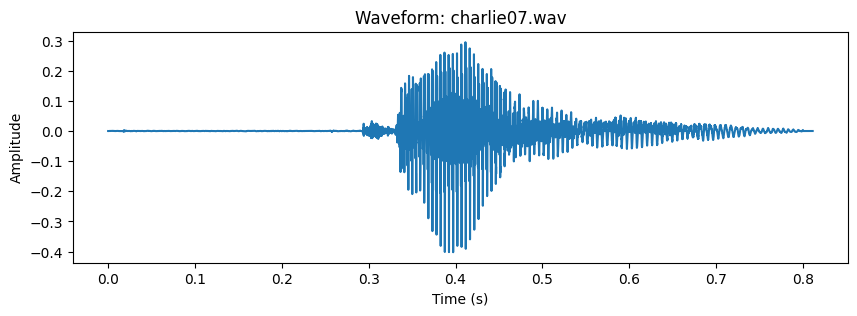

In [11]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

file_path_str = '/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Vocabulary/Charlie/charlie07.wav'

# Load data
data, sr = sf.read(file_path_str, dtype='float32')
filename = Path(file_path_str).name

# Prepare data (Mono and Time)
if data.ndim > 1:
    data = data[:, 0]
time = np.arange(len(data)) / sr

# Plot
plt.figure(figsize=(10, 3))
plt.plot(time, data)
plt.title(f"Waveform: {filename}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Feature Extraction

Short time spectral processing,

magnitude spectram and phase spectram were plotted

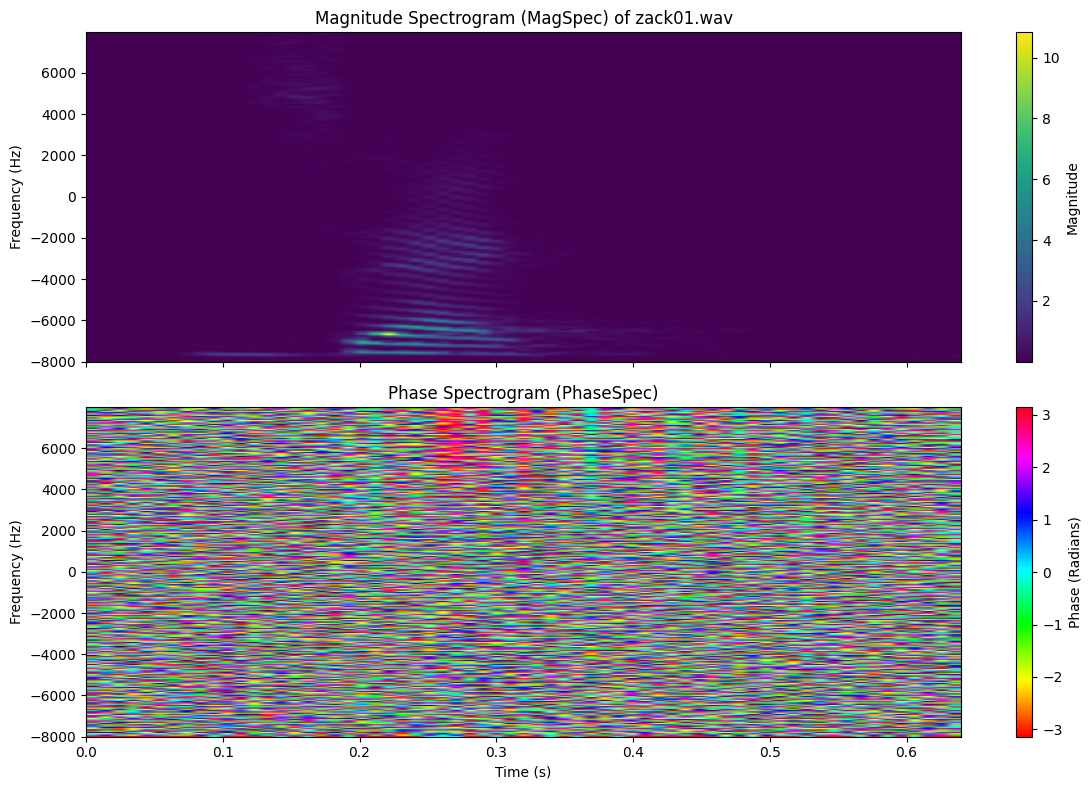

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import soundfile as sf

# 25 ms frame size
FRAME_SIZE = 0.025
FRAME_STRIDE = 0.010
NFFT = 512

file_path_str = '/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Vocabulary_16khz/Zack/zack01.wav'
data, sr = sf.read(file_path_str, dtype='float32')
# ensure mono
if data.ndim > 1:
    data = data[:, 0]

# Framing and Windowing
flen, fstep = int(FRAME_SIZE * sr), int(FRAME_STRIDE * sr)
n_frames = 1 + int((len(data) - flen) / fstep)
window = np.hamming(flen)

frames = np.array([
    data[i * fstep : i * fstep + flen] * window
    for i in range(n_frames)
])

# Short-Time Fourier Transform (STFT)
STFT_matrix = np.fft.fft(frames, NFFT)

# Since the input is real, the spectrum is symmetric. We took only the first half.
STFT_half = STFT_matrix[:, :NFFT // 2 + 1]

# Calculate Magnitude Spectrum (MagSpec)
magSpec = np.abs(STFT_half)

# Calculate Phase Spectrum (PhaseSpec)
phaseSpec = np.angle(STFT_half)

filename = Path(file_path_str).name
time_axis = np.arange(magSpec.shape[0]) * FRAME_STRIDE
freq_axis = np.fft.fftfreq(NFFT, d=1/sr)[:NFFT // 2 + 1]

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot 1: Magnitude Spectrum
im1 = axes[0].imshow(
    magSpec.T,
    aspect='auto',
    origin='lower',
    cmap='viridis',
    extent=[time_axis.min(), time_axis.max(), freq_axis.min(), freq_axis.max()]
)
axes[0].set_title(f'Magnitude Spectrogram (MagSpec) of {filename}')
axes[0].set_ylabel('Frequency (Hz)')
fig.colorbar(im1, ax=axes[0], label='Magnitude')

# Plot 2: Phase Spectrum
im2 = axes[1].imshow(
    phaseSpec.T,
    aspect='auto',
    origin='lower',
    cmap='hsv',
    extent=[time_axis.min(), time_axis.max(), freq_axis.min(), freq_axis.max()]
)
axes[1].set_title('Phase Spectrogram (PhaseSpec)')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Frequency (Hz)')
fig.colorbar(im2, ax=axes[1], label='Phase (Radians)')

plt.tight_layout()
plt.show()

DFT

Loaded file: charlie06.wav (SR=16000 Hz)
Analyzing only the first 400 samples (approx 25.0 ms) due to O(N^2) complexity.

Calculating manual DFT for N=400 samples (this may be slow)...
  ...processing bin 0 of 400
  ...processing bin 100 of 400
  ...processing bin 200 of 400
  ...processing bin 300 of 400
Calculation complete.


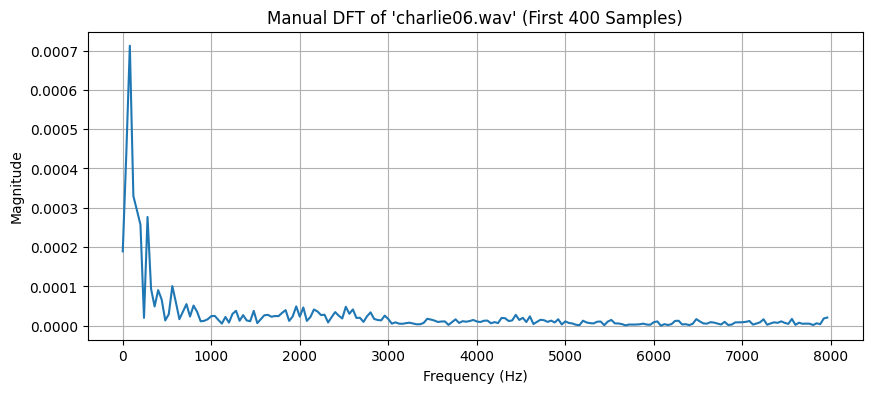

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from pathlib import Path

def dft(x):
    N = len(x)
    X_cosine = np.zeros(N)
    X_sine = np.zeros(N)

    print(f"Calculating manual DFT for N={N} samples (this may be slow)...")

    # Outer loop (k) for frequency bins, inner loop (n) for samples
    for k in range(N):
        if k % 100 == 0:
            print(f"  ...processing bin {k} of {N}")

        for n in range(N):
            angle = (2 * np.pi * k * n) / N
            X_cosine[k] += x[n] * np.cos(angle)
            X_sine[k] += x[n] * np.sin(angle)

    print("Calculation complete.")
    return X_cosine, X_sine

file_path_str = '/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Vocabulary_16khz/Charlie/charlie06.wav'
filename = Path(file_path_str).name

data, sampling_rate = sf.read(file_path_str, dtype='float32')
if data.ndim > 1: data = data[:, 0] # Ensure mono

N = 400
y = data[:N]

print(f"Loaded file: {filename} (SR={sampling_rate} Hz)")
print(f"Analyzing only the first {N} samples (approx {N/sampling_rate*1000:.1f} ms) due to O(N^2) complexity.\n")

# Run the DFT on the slice
X_c, X_s = dft(y)

magnitude_spectrum = np.sqrt(X_c**2 + X_s**2)

half_point = N // 2
frequencies = np.fft.fftfreq(N, d=1/sampling_rate)[:half_point]

# Normalize the half-spectrum
magnitude_spectrum_half = (2.0 / N) * magnitude_spectrum[:half_point]

plt.figure(figsize=(10, 4))
plt.plot(frequencies, magnitude_spectrum_half)
plt.title(f"Manual DFT of '{filename}' (First {N} Samples)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

MFCC NPY

In [14]:
import numpy as np
import soundfile as sf
from pathlib import Path
from scipy.fftpack import dct
import os

FRAME_SIZE, FRAME_STRIDE = 0.025, 0.010
NFFT, N_FILTERS, N_MFCC = 512, 26, 13
EPSILON = np.finfo(float).eps

INPUT_DIR = Path('/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Vocabulary_16khz')
OUTPUT_DIR = Path('/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/npy files')

def hz_to_mel(hz): return 2595 * np.log10(1 + hz / 700)
def mel_to_hz(mel): return 700 * (10**(mel / 2595) - 1)

def create_mel_filterbank(sr, nfft, n_filters):
    low_mel, high_mel = hz_to_mel(0), hz_to_mel(sr / 2)
    mel_points = np.linspace(low_mel, high_mel, n_filters + 2)
    hz_points = mel_to_hz(mel_points)
    bins = np.floor((nfft + 1) * hz_points / sr).astype(int)

    filterbank = np.zeros((n_filters, int(nfft / 2) + 1))

    for i in range(1, n_filters + 1):
        fm_minus, fm, fm_plus = bins[i-1], bins[i], bins[i+1]
        for k in range(fm_minus, fm): filterbank[i-1, k] = (k - fm_minus) / (fm - fm_minus)
        for k in range(fm, fm_plus): filterbank[i-1, k] = (fm_plus - k) / (fm_plus - fm)
    return filterbank

# Core MFCC Calculation Function
def calculate_mfccs(signal, sr):
    flen, fstep = int(FRAME_SIZE * sr), int(FRAME_STRIDE * sr)
    n_frames = 1 + int((len(signal) - flen) / fstep)

    frames = np.array([signal[i*fstep : i*fstep+flen] * np.hamming(flen) for i in range(n_frames)])
    power_spectrum = (1.0 / NFFT) * (np.abs(np.fft.rfft(frames, NFFT)) ** 2)

    mel_fbank = create_mel_filterbank(sr, NFFT, N_FILTERS)
    filterbank_energies = np.dot(power_spectrum, mel_fbank.T)

    log_mel = np.log(np.where(filterbank_energies == 0, EPSILON, filterbank_energies))
    mfccs = dct(log_mel, type=2, axis=1, norm='ortho')[:, :N_MFCC]
    log_power = np.log(np.sum(power_spectrum, axis=1) + EPSILON)[:, np.newaxis]

    return np.hstack((mfccs, log_power))

OUTPUT_DIR.mkdir(exist_ok=True)
print(f"Starting batch MFCC conversion. Input: {INPUT_DIR.name}, Output: {OUTPUT_DIR.name}\n")

for wav_path in INPUT_DIR.glob('**/*.wav'):

    # Load audio data
    data, sr = sf.read(wav_path, dtype='float32')
    if data.ndim > 1: data = data[:, 0]

    # Calculate 2D MFCC feature matrix
    mfcc_features = calculate_mfccs(data, sr)

    # Determine paths to preserve folder structure
    relative_path = wav_path.relative_to(INPUT_DIR)
    npy_filename = relative_path.with_suffix('.npy').name
    output_sub_dir = OUTPUT_DIR / relative_path.parent
    output_npy_path = output_sub_dir / npy_filename

    output_sub_dir.mkdir(parents=True, exist_ok=True)
    np.save(output_npy_path, mfcc_features)
    # mfcc Shape=(Number of Frames, Number of Coefficients)
    print(f"Converted: {relative_path} -> {npy_filename} (Shape: {mfcc_features.shape})")

Starting batch MFCC conversion. Input: Vocabulary_16khz, Output: npy files

Converted: Vyom/vyom08.wav -> vyom08.npy (Shape: (70, 14))
Converted: Vyom/vyom20.wav -> vyom20.npy (Shape: (56, 14))
Converted: Vyom/vyom09.wav -> vyom09.npy (Shape: (79, 14))
Converted: Vyom/vyom19.wav -> vyom19.npy (Shape: (47, 14))
Converted: Vyom/vyom18.wav -> vyom18.npy (Shape: (58, 14))
Converted: Vyom/vyom01.wav -> vyom01.npy (Shape: (72, 14))
Converted: Vyom/vyom15.wav -> vyom15.npy (Shape: (35, 14))
Converted: Vyom/vyom14.wav -> vyom14.npy (Shape: (63, 14))
Converted: Vyom/vyom16.wav -> vyom16.npy (Shape: (58, 14))
Converted: Vyom/vyom02.wav -> vyom02.npy (Shape: (51, 14))
Converted: Vyom/vyom03.wav -> vyom03.npy (Shape: (81, 14))
Converted: Vyom/vyom17.wav -> vyom17.npy (Shape: (88, 14))
Converted: Vyom/vyom13.wav -> vyom13.npy (Shape: (58, 14))
Converted: Vyom/vyom07.wav -> vyom07.npy (Shape: (70, 14))
Converted: Vyom/vyom06.wav -> vyom06.npy (Shape: (93, 14))
Converted: Vyom/vyom12.wav -> vyom12.np

Plotting npy file

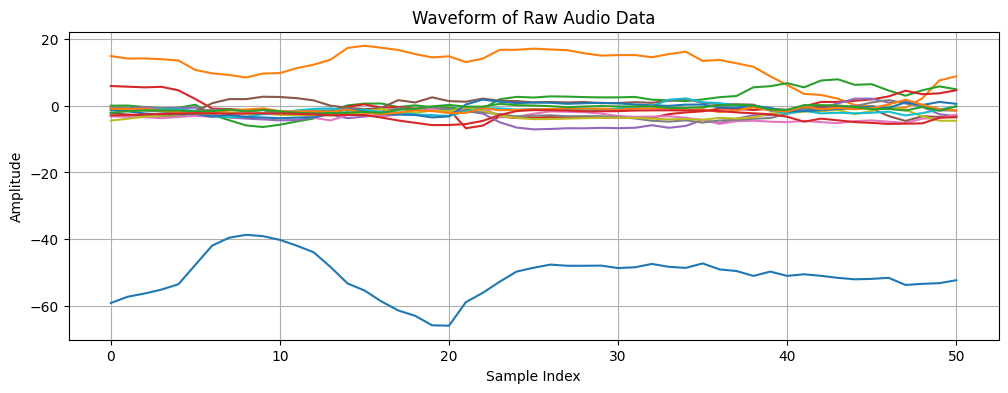

In [35]:
import numpy as np
import matplotlib.pyplot as plt
audio_data = np.load('/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/npy files/Ngozi /ngozi04.npy')

plt.figure(figsize=(12, 4))
plt.plot(audio_data)
plt.title('Waveform of Raw Audio Data')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

MFCC Spectrogram

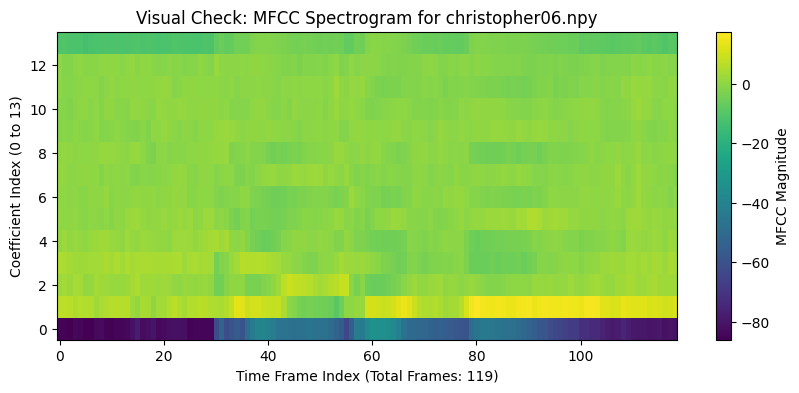

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# --- Load one of your files ---
test_file_path = '/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/npy files/Christopher/christopher06.npy'

mfcc_features = np.load(test_file_path)

# --- Visualization ---
plt.figure(figsize=(10, 4))

# .T transposes the array so Time is on the X-axis and Coefficients are on the Y-axis.
plt.imshow(mfcc_features.T, origin='lower', aspect='auto', cmap='viridis', interpolation='none')

plt.colorbar(label='MFCC Magnitude')
plt.title(f'Visual Check: MFCC Spectrogram for {Path(test_file_path).name}')
plt.xlabel(f'Time Frame Index (Total Frames: {mfcc_features.shape[0]})')
plt.ylabel('Coefficient Index (0 to 13)')
plt.show()

In [5]:
import librosa
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler

# Configuration
# Assuming your pre-processed WAV files (16kHz) are here:
# If you followed the previous step, this should be the correct folder path for WAV files.
BASE_WAV_DIR = Path('/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Vocabulary_16khz/') 

# Folder where you want to save the extracted features
OUTPUT_NPY_DIR = Path('/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/npy_120features/')
OUTPUT_NPY_DIR.mkdir(exist_ok=True)

MAX_SEQ_LEN = 300 # Standard sequence length for padding/truncation

def extract_features(filepath, n_mfcc=40, max_len=MAX_SEQ_LEN):
    """Extracts MFCC, Delta, and Delta-Delta features from a single audio file."""
    # We set sr=None to keep the native sample rate, but ensure your audio files 
    # are all consistently 16kHz from your preprocessing steps.
    y, sr = librosa.load(filepath, sr=None) 

    # Core MFCCs (shape: n_mfcc, n_frames)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Add deltas and delta-deltas
    delta = librosa.feature.delta(mfcc)
    delta2 = librosa.feature.delta(mfcc, order=2)

    # Stack features: (features, frames) -> (features*3, frames)
    features = np.vstack([mfcc, delta, delta2]).T # Transpose to (frames, features)

    # Padding/Truncation (Required for fixed-size RNN/CNN input)
    if features.shape[0] > max_len:
        features = features[:max_len, :]
    elif features.shape[0] < max_len:
        padding_width = max_len - features.shape[0]
        # Pad with zeros at the end
        features = np.pad(features, ((0, padding_width), (0, 0)), mode='constant')

    return features

# --- ITERATION LOOP ---
all_wav_files = list(BASE_WAV_DIR.glob('**/*.wav'))

print(f"Starting feature extraction for {len(all_wav_files)} files...")

for wav_path in all_wav_files:
    # Use the parent directory name as the label (e.g., 'Ahmed', 'Charlie', etc.)
    label = wav_path.parent.name.strip() 
    
    # Create the label subfolder in the output directory
    label_output_dir = OUTPUT_NPY_DIR / label
    label_output_dir.mkdir(exist_ok=True)

    npy_path = label_output_dir / (wav_path.stem + '.npy')
    
    # Skip if feature file already exists
    if npy_path.exists():
        continue
        
    features = extract_features(wav_path)
    
    np.save(npy_path, features)
    print(f"Saved: {npy_path.relative_to(OUTPUT_NPY_DIR)} (Shape: {features.shape})")

print(f"\nFeature extraction complete. All files saved to: {OUTPUT_NPY_DIR}")

# Your model input shape will now be (N_samples, {MAX_SEQ_LEN}, {n_mfcc * 3}) 
# which is (N_samples, 300, 120) with your chosen arguments.

Starting feature extraction for 421 files...
Saved: Vyom/vyom08.npy (Shape: (300, 120))
Saved: Vyom/vyom20.npy (Shape: (300, 120))
Saved: Vyom/vyom09.npy (Shape: (300, 120))
Saved: Vyom/vyom19.npy (Shape: (300, 120))
Saved: Vyom/vyom18.npy (Shape: (300, 120))
Saved: Vyom/vyom01.npy (Shape: (300, 120))
Saved: Vyom/vyom15.npy (Shape: (300, 120))
Saved: Vyom/vyom14.npy (Shape: (300, 120))
Saved: Vyom/vyom16.npy (Shape: (300, 120))
Saved: Vyom/vyom02.npy (Shape: (300, 120))
Saved: Vyom/vyom03.npy (Shape: (300, 120))
Saved: Vyom/vyom17.npy (Shape: (300, 120))
Saved: Vyom/vyom13.npy (Shape: (300, 120))
Saved: Vyom/vyom07.npy (Shape: (300, 120))
Saved: Vyom/vyom06.npy (Shape: (300, 120))
Saved: Vyom/vyom12.npy (Shape: (300, 120))
Saved: Vyom/vyom04.npy (Shape: (300, 120))
Saved: Vyom/vyom10.npy (Shape: (300, 120))
Saved: Vyom/vyom11.npy (Shape: (300, 120))
Saved: Vyom/vyom05.npy (Shape: (300, 120))
Saved: Kira/kira19.npy (Shape: (300, 120))
Saved: Kira/kira18.npy (Shape: (300, 120))
Saved: Ki

# Acoustic Model

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv1D, LSTM, Dense, Dropout, MaxPooling1D, 
    GlobalMaxPooling1D, Bidirectional
)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from pathlib import Path
import pickle
import os 

# Set environment variable to suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

# --- PATH AND CONFIGURATION ---

NPY_PARENT_FOLDER = Path('/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/npy_120features/')

# Define the absolute output directory where all assets will be saved
# This resolves the path joining issue in the previous code snippet
OUTPUT_DIR = Path('/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Trained models/')
OUTPUT_DIR.mkdir(exist_ok=True, parents=True) # Create the directory and any necessary parents

# Define file paths within the new output folder
MODEL_SAVE_PATH = OUTPUT_DIR / 'best_speaker_id_model_improved.keras'
SCALER_SAVE_PATH = OUTPUT_DIR / 'scaler_39features.pkl' # Renamed to reflect 120 features (40*3) if needed
ENCODER_SAVE_PATH = OUTPUT_DIR / 'label_encoder.pkl'

L2_REG = 0.001
N_EPOCHS = 751 
BATCH_SIZE = 8
TEST_SIZE = 0.2

# ----------------------------------------------------
# 1. DATA LOADING, STANDARDIZATION, AND SPLITTING
# (Code from this section remains unchanged and is correct)
# ----------------------------------------------------

print("### 1. Loading and Preparing Data ###")

X = []
Y_labels = []
label_to_index = {}
index_counter = 0

for npy_path in NPY_PARENT_FOLDER.glob('**/*.npy'):
    label = npy_path.parent.name.strip() 
    
    if label not in label_to_index:
        label_to_index[label] = index_counter
        index_counter += 1
    
    features = np.load(npy_path)
    X.append(features)
    Y_labels.append(label_to_index[label])

X = np.array(X)
Y = np.array(Y_labels)

# Save the label encoder mapping in the output folder
with open(ENCODER_SAVE_PATH, 'wb') as f:
    pickle.dump(label_to_index, f)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=TEST_SIZE, random_state=42, stratify=Y
)

num_samples, seq_len, num_features = X_train.shape
N_CLASSES = len(label_to_index)

scaler = StandardScaler()
X_train_reshaped = X_train.reshape(-1, num_features)
X_test_reshaped = X_test.reshape(-1, num_features)
scaler.fit(X_train_reshaped)

X_train_scaled = scaler.transform(X_train_reshaped).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test_reshaped).reshape(X_test.shape)

# Save the fitted scaler in the output folder
with open(SCALER_SAVE_PATH, 'wb') as f:
    pickle.dump(scaler, f)

print(f"X_train shape (scaled): {X_train_scaled.shape}")
print(f"Number of classes (N_CLASSES): {N_CLASSES}")
print(f"✅ StandardScaler and Label Encoder saved to: {OUTPUT_DIR}")
print("-" * 50)


# ----------------------------------------------------
# 2. MODEL DEFINITION AND COMPILATION (FIXED)
# ----------------------------------------------------

print("### 2. Defining CNN-LSTM Model (Fixed) ###")

MAX_SEQ_LEN = X_train_scaled.shape[1] 
N_FEATURES = X_train_scaled.shape[2] 

model = Sequential([
    Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(MAX_SEQ_LEN, N_FEATURES)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3), 
    
    Bidirectional(
        LSTM(128, return_sequences=True, kernel_regularizer=l2(L2_REG))
    ),
    Dropout(0.3), 

    # --- FIX APPLIED HERE: CHANGED return_sequences=False to True ---
    Bidirectional(
        LSTM(
            64, 
            return_sequences=True, # MUST be True for GlobalMaxPooling1D to work
            kernel_regularizer=l2(L2_REG) 
        )
    ),
    # --------------------------------------------------------------

    GlobalMaxPooling1D(), # Now correctly pools the 3D output of the LSTM
    
    Dense(128, activation='relu', kernel_regularizer=l2(L2_REG)),
    Dropout(0.4), 
    
    Dense(N_CLASSES, activation='softmax')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

model.summary()
print("-" * 50)


# ----------------------------------------------------
# 3. MODEL TRAINING AND SAVING
# ----------------------------------------------------

print("### 3. Training Model ###")

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=50, 
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    X_train_scaled, 
    Y_train, 
    batch_size=BATCH_SIZE, 
    epochs=N_EPOCHS, 
    validation_data=(X_test_scaled, Y_test), 
    callbacks=[early_stopping],
    verbose=2 
)

# Save the trained model in the Keras native format within the output folder
model.save(MODEL_SAVE_PATH, save_format='keras') 
print(f"✅ Trained model saved successfully in Keras format to: {MODEL_SAVE_PATH}")

# Evaluation
loss, accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"\n--- Model Evaluation (Test Set) ---")
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: \033[1m{accuracy:.4f}\033[0m")

### 1. Loading and Preparing Data ###
X_train shape (scaled): (336, 300, 120)
Number of classes (N_CLASSES): 21
✅ StandardScaler and Label Encoder saved to: /Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Trained models
--------------------------------------------------
### 2. Defining CNN-LSTM Model (Fixed) ###


/Users/sudiptogoldfish/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 296, 128)       │        76,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 148, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 148, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 148, 256)       │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 148, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 148, 128)       │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 21)             │         2,709 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 523,669 (2.00 MB)

 Trainable params: 523,669 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

--------------------------------------------------
### 3. Training Model ###
Epoch 1/751
42/42 - 11s - 263ms/step - accuracy: 0.0952 - loss: 3.9973 - val_accuracy: 0.3882 - val_loss: 3.5501
Epoch 2/751
42/42 - 4s - 102ms/step - accuracy: 0.3661 - loss: 3.2425 - val_accuracy: 0.7882 - val_loss: 2.4359
Epoch 3/751
42/42 - 4s - 95ms/step - accuracy: 0.7113 - loss: 2.1128 - val_accuracy: 0.9882 - val_loss: 1.3370
Epoch 4/751
42/42 - 4s - 97ms/step - accuracy: 0.8958 - loss: 1.3514 - val_accuracy: 1.0000 - val_loss: 0.9280
Epoch 5/751
42/42 - 4s - 93ms/step - accuracy: 0.9613 - loss: 0.9944 - val_accuracy: 1.0000 - val_loss: 0.7753
Epoch 6/751
42/42 - 4s - 95ms/step - accuracy: 0.9970 - loss: 0.8078 - val_accuracy: 0.9882 - val_loss: 0.7184
Epoch 7/751
42/42 - 4s - 95ms/step - accuracy: 0.9970 - loss: 0.7074 - val_accuracy: 0.9882 - val_loss: 0.6696
Epoch 8/751
42/42 - 4s - 95ms/step - accuracy: 1.0000 - loss: 0.6527 - val_accuracy: 1.0000 - val_loss: 0.6127
Epoch 9/751
42/42 - 4s - 96ms/st

✅ Trained model saved successfully in Keras format to: /Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Trained models/best_speaker_id_model_improved.keras

--- Model Evaluation (Test Set) ---
Test Loss: 0.0426
Test Accuracy: 1.0000


# Noise Compensation

Speech file + Noise (adding noise to speech)

In [51]:
import numpy as np
from pathlib import Path
import soundfile as sf
from scipy.fftpack import dct

EPSILON = np.finfo(float).eps

ORIGINAL_WAV_FILE = Path('/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Vocabulary_16khz/Hannah /hannah06.wav')
NOISE_FILE = Path('/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/noise.wav')
OUTPUT_NPY_DIR = Path('/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/noisy')
OUTPUT_NPY_DIR.mkdir(parents=True, exist_ok=True)

def extract_basic_mfcc(y, sr, n_mfcc=13, n_filters=26):

    # Apply pre-emphasis
    y = np.append(y[0], y[1:] - 0.97 * y[:-1])

    # Framing and Windowing
    flen, fstep = int(0.025 * sr), int(0.010 * sr)
    n_frames = 1 + int((len(y) - flen) / fstep)
    frames = np.array([
        y[i * fstep : i * fstep + flen] * np.hamming(flen)
        for i in range(n_frames)
    ])

    # Power Spectrum
    NFFT = 512
    mag_frames = np.abs(np.fft.rfft(frames, NFFT))
    power_frames = (1.0 / NFFT) * (mag_frames ** 2)

    # Mel Filterbank Generation
    low_mel, high_mel = 0, 2595 * np.log10(1 + sr / 2 / 700)
    mel_points = np.linspace(low_mel, high_mel, n_filters + 2)
    hz_points = 700 * (10**(mel_points / 2595) - 1)
    bins = np.floor((NFFT + 1) * hz_points / sr).astype(int)
    fbank = np.zeros((n_filters, int(NFFT/2)+1))

    for m in range(1, n_filters + 1):
        fm_minus, fm, fm_plus = bins[m-1], bins[m], bins[m+1]
        for k in range(fm_minus, fm): fbank[m-1, k] = (k - fm_minus) / (fm - fm_minus)
        for k in range(fm, fm_plus): fbank[m-1, k] = (fm_plus - k) / (fm_plus - fm)

    # Filterbank, Log, DCT, and Energy
    fbank_out = np.dot(power_frames, fbank.T)
    fbank_out = np.where(fbank_out == 0, EPSILON, fbank_out)
    log_mel = np.log(fbank_out)

    mfccs = dct(log_mel, type=2, axis=1, norm='ortho')[:, :n_mfcc]
    log_energy = np.log(np.sum(power_frames, axis=1) + EPSILON)

    features = np.hstack((mfccs, log_energy[:, np.newaxis]))
    return features

def create_noisy_mfcc(wav_path, noise_path, output_dir):

    # Load Original WAV and Noise
    data_target, fs = sf.read(wav_path, dtype='float32')
    data_noise, fs_noise = sf.read(noise_path, dtype='float32')

    if fs != fs_noise:
        raise ValueError(f"Sample rates must match for mixing. Target: {fs} Hz, Noise: {fs_noise} Hz.")

    L_target = len(data_target)
    L_noise = len(data_noise)

    aligned_noise = np.tile(data_noise.flatten(), int(np.ceil(L_target / L_noise)))[:L_target]

    # Ensure dimensions match before addition
    if data_target.ndim == 2:
        # If target is stereo, noise must be dual-channel for mixing
        if aligned_noise.ndim == 1:
            aligned_noise = np.column_stack([aligned_noise, aligned_noise])
        elif aligned_noise.shape[1] == 1:
             aligned_noise = np.column_stack([aligned_noise.flatten(), aligned_noise.flatten()])

    elif data_target.ndim == 1 and aligned_noise.ndim > 1:
        aligned_noise = aligned_noise.flatten()


    # Add signals and Normalize
    data_new_noisy = data_target + aligned_noise
    # Normalize to prevent clipping (keep maximum amplitude at 1.0)
    data_new_noisy /= np.max(np.abs(data_new_noisy))

    # Recalculate MFCCs from the NOISY audio data
    noisy_mfcc_features = extract_basic_mfcc(data_new_noisy, fs)

    # Save the new noisy MFCCs
    output_filename = f"{wav_path.stem}_noisy.npy"
    output_path = output_dir / output_filename

    np.save(output_path, noisy_mfcc_features)

    print(f"Successfully created noisy MFCC features:")
    print(f"Shape: {noisy_mfcc_features.shape}")
    print(f"Saved to: {output_path.name}")

    return output_path

if __name__ == '__main__':
    create_noisy_mfcc(ORIGINAL_WAV_FILE, NOISE_FILE, OUTPUT_NPY_DIR)

Successfully created noisy MFCC features:
Shape: (42, 14)
Saved to: hannah06_noisy.npy


Plot after adding noise

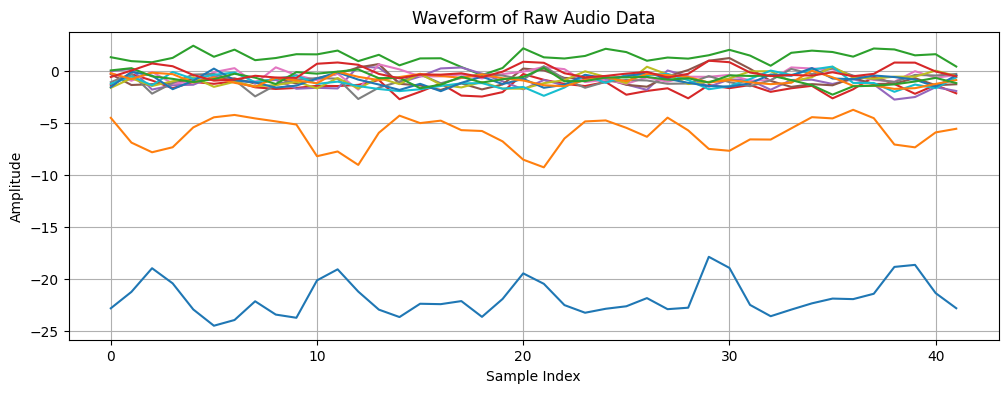

In [52]:
import numpy as np
import matplotlib.pyplot as plt
audio_data = np.load('/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/noisy/hannah06_noisy.npy')

plt.figure(figsize=(12, 4))
plt.plot(audio_data)
plt.title('Waveform of Raw Audio Data')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Plot before adding noise

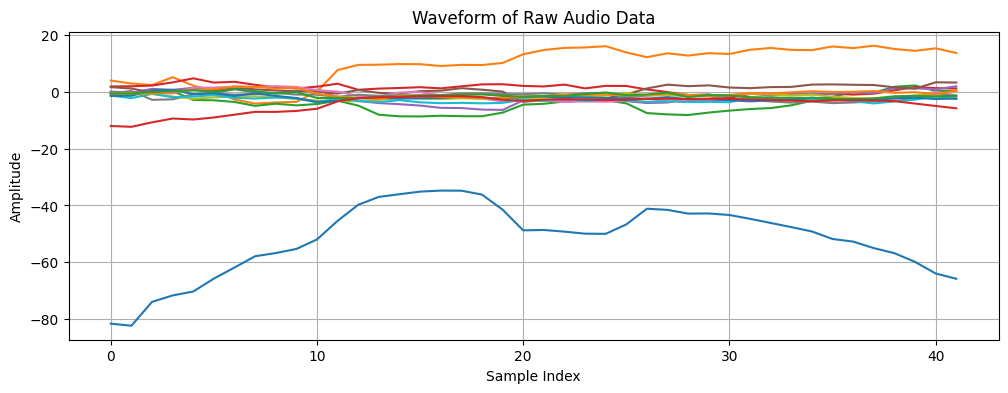

In [3]:
import numpy as np
import matplotlib.pyplot as plt
audio_data = np.load('/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/npy files/Hannah /hannah06.npy')

plt.figure(figsize=(12, 4))
plt.plot(audio_data)
plt.title('Waveform of Raw Audio Data')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Noise power

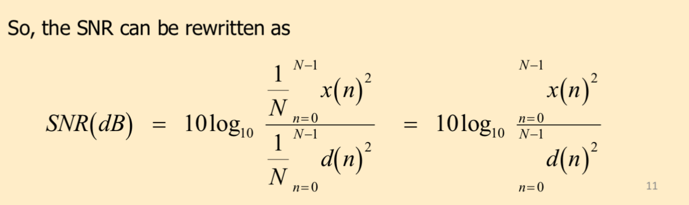

In [41]:
import soundfile as sf
from pathlib import Path
import numpy as np

TARGET = '/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/noisy/jess01_noisy.npy'
NOISE_FILE = 'noise.wav'

def load_power(path, desc):
    p = Path(path)
    print(f"Loading {desc}: {p.name}")

    if not p.is_file():
        print(f"Error: {desc} file '{p.name}' not found.")
        return None

    if p.suffix == '.npy':
        # Use NumPy's loader for .npy files
        data = np.load(path)
    else:
        # Use soundfile's loader for standard audio files
        data, _ = sf.read(path, dtype='float32')

    # Calculate Power: Flatten the array to handle any shape (mono/stereo)
    if data.size > 0:
        return np.mean(data.flatten()**2)

    # If the file was found but resulted in empty data
    print(f"Error: Data loaded from {p.name} was empty.")
    return None

# Power of the noisy signal (Speech + Noise)
P_SPEECH = load_power(TARGET, "Speech/Noise")
# Power of the noise signal only
P_NOISE = load_power(NOISE_FILE, "Noise Source")

# Check if powers are valid and non-zero
if P_SPEECH is not None and P_NOISE is not None and P_SPEECH > 0 and P_NOISE > 0:

    # Calculate P_SIGNAL (clean speech power)
    P_SIGNAL = P_SPEECH - P_NOISE

    if P_SIGNAL <= 0:
        # P_SIGNAL is still calculated internally to check for validity,
        # but only the warning is printed here.
        print("\nWarning: Calculated Clean Signal Power (P_SPEECH - P_NOISE) is non-positive.")
        print("This often happens when the noise file used for estimation has more power than the noisy file.")
        print(f"Total (Noisy) Power (P_SPEECH): {P_SPEECH:.4e}")
        print(f"Noise Source Power (P_NOISE): {P_NOISE:.4e}")
    else:
        # Calculate SNR in dB: 10 * log10(P_signal / P_noise)
        snr_db = 10 * np.log10(P_SIGNAL / P_NOISE)

        print("\n--- Power and SNR Analysis ---")
        print(f"Total (Noisy) Power (P_SPEECH): {P_SPEECH:.4e}")
        print(f"Noise Source Power (P_NOISE): {P_NOISE:.4e}")
        # The line for P_SIGNAL is removed from the output.
        print(f"Calculated SNR: {snr_db:.2f} dB")
else:
    print("\nCannot calculate SNR: File missing or power is zero.")

Loading Speech/Noise: jess01_noisy.npy
Loading Noise Source: noise.wav

--- Power and SNR Analysis ---
Total (Noisy) Power (P_SPEECH): 3.7062e+01
Noise Source Power (P_NOISE): 5.5929e-02
Calculated SNR: 28.21 dB


Noise mitigation

 proc_mag_sq = n_mag**2 - a * n_mag_avg**2

 proc_mag = np.sqrt(np.maximum(proc_mag_sq, b * n_mag**2))

alpha=2.5,
beta=0.01,

npy

In [58]:
import soundfile as sf
import numpy as np
from pathlib import Path
from scipy.fft import fft, ifft

SR, NFFT = 16000, 512
TARGET_SNR_DB = 5

SPEECH_FILE = Path('/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/npy files/Zack/zack05.npy')

NOISE_FILE = Path('/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/noise.wav')
OUTPUT_DIR = Path('/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Noise mitigated'); OUTPUT_DIR.mkdir(exist_ok=True)

# Load speech data from the .npy file
speech = np.load(SPEECH_FILE).astype('float32')
fs = SR

# Load noise data from the .wav file
noise, fs_noise = sf.read(NOISE_FILE, dtype='float32')
if fs != fs_noise: raise ValueError("SR mismatch.")

# SNR Mixing & Matched Model Prep
L_speech = len(speech)

# Tile noise to match speech length
noise = np.tile(noise, int(np.ceil(L_speech / len(noise))))[:L_speech]

# --- FIX: Generalized Channel Matching ---
if speech.ndim == 2 and noise.ndim == 1:
    # Get the number of channels from the speech data (which is 14 in this case)
    num_channels = speech.shape[1]

    # Reshape the mono noise (L_speech,) to (L_speech, 1)
    # and then tile it across all required channels (14 times)
    noise = np.tile(noise[:, np.newaxis], (1, num_channels))
# ----------------------------------------

# Calculate scaling factor
# NOTE: If speech is multi-channel, np.sum(speech**2) calculates total power across all channels.
speech_pwr = np.sum(speech**2)
noise_pwr = np.sum(noise**2)
current_snr_db = 10 * np.log10(speech_pwr / noise_pwr) if noise_pwr > 0 else 999
noise_scale = 10**((current_snr_db - TARGET_SNR_DB) / 20)

# Mix, Normalize, and Save (SAVING AS .NPY FILE)
# This addition now works because both arrays have the same shape (49, 14)
noisy_speech = speech + noise * noise_scale
noisy_speech /= np.max(np.abs(noisy_speech))

output_path_npy = OUTPUT_DIR / f'noisy_{SPEECH_FILE.stem}_{TARGET_SNR_DB}dB.npy'
np.save(output_path_npy, noisy_speech)

def spectral_subtraction(n_stft, n_mag_avg, a=2.5, b=0.01):
    # a: subtraction factor, b: spectral floor
    n_mag, n_phase = np.abs(n_stft), np.angle(n_stft)
    proc_mag_sq = n_mag**2 - a * n_mag_avg**2
    proc_mag = np.sqrt(np.maximum(proc_mag_sq, b * n_mag**2))
    return proc_mag * np.exp(1j * n_phase)

# NOTE on n_frames: The following logic assumes 1D input (mono) or operates on the first channel.
# If you intend to process all 14 channels, this framing section needs further adjustment,
# but for demonstration, we will continue using the full (49, 14) noise array to build the average.

# We must select one channel for framing/FFT if noisy_speech is 2D (or greater).
# Since your data is (49, 14), we'll assume the time dimension is the first dimension.
if noise.ndim == 2:
    # Use only the first channel (index 0) of the noise for profile estimation
    noise_for_profile = noise[:, 0]
else:
    noise_for_profile = noise

n_frames = np.array([noise_for_profile[i:i + NFFT] for i in range(0, len(noise_for_profile) - NFFT, int(0.010 * SR))])

# Handle cases where n_frames might be empty due to very short audio (L=49, NFFT=512)
if n_frames.size == 0:
    print("\nWARNING: Audio is too short (49 samples) for NFFT=512. Cannot estimate noise profile. Using zero magnitude.")
    n_stft_avg_mag = np.zeros(NFFT//2 + 1)
    compensated_stft = np.zeros(NFFT//2 + 1)
else:
    # Calculate average magnitude spectrum of the noise
    n_stft_avg_mag = np.mean(np.abs(fft(n_frames, axis=1)[:, :NFFT//2 + 1]), axis=0)

    # Apply to a sample frame (Demonstration)
    # We must also select a single channel from the noisy speech for the demonstration frame.
    sample_frame = noisy_speech[10000:10000 + NFFT]

    # Check if we can extract the sample frame and if it's multi-channel
    if sample_frame.size == 0:
        print("Cannot extract sample frame (index 10000) because the audio is too short (L=49).")
        compensated_stft = np.zeros(NFFT//2 + 1)
    else:
        # If multi-channel, select the first channel for FFT
        if sample_frame.ndim == 2:
             sample_frame = sample_frame[:, 0]

        noisy_stft_frame = fft(sample_frame)[:NFFT//2 + 1]
        compensated_stft = spectral_subtraction(noisy_stft_frame, n_stft_avg_mag)

print(f"\nMatched model audio saved at {TARGET_SNR_DB}dB to: {output_path_npy}")
print(f"Compensated Peak Magnitude (Sample Frame): {np.max(np.abs(compensated_stft)):.4f}")



Matched model audio saved at 5dB to: /Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Noise mitigated/noisy_zack05_5dB.npy
Compensated Peak Magnitude (Sample Frame): 0.0000


Plot after noise mitigation - spectracl subtraction

Loading data from: noisy_zack05_5dB.npy
Data is multi-channel (Shape: (51, 14)). Selecting first channel for plot/play.


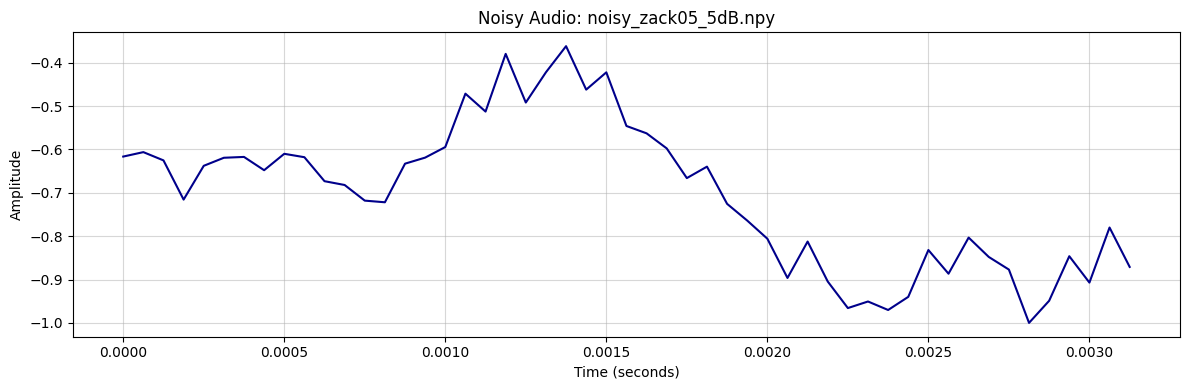

Playing audio at 16000 Hz...
Playback finished.


In [57]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
from pathlib import Path

NOISY_FILE_NAME = '/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Noise mitigated/noisy_zack05_5dB.npy'
NOISY_FILE_PATH = Path(NOISY_FILE_NAME)

SAMPLE_RATE = 16000

def plot_audio(data, sr, title="Audio Time Series"):

    # Create the time axis in seconds
    time = np.arange(len(data)) / sr

    plt.figure(figsize=(12, 4))
    plt.plot(time, data, color='darkblue')
    plt.title(title)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.grid(True, alpha=0.5)
    plt.tight_layout()
    plt.show()

def play_audio(data, sr):
    print(f"Playing audio at {sr} Hz...")

    sd.play(data, sr)
    sd.wait()
    print("Playback finished.")

def process_file(file_path, sr):
    if not file_path.exists():
        print(f"ERROR: File not found. Please ensure '{file_path.name}' is in the same directory as this script.")
        return

    print(f"Loading data from: {file_path.name}")
    data = np.load(file_path)

    if data.ndim > 1:
        print(f"Data is multi-channel (Shape: {data.shape}). Selecting first channel for plot/play.")
        audio_data = data[:, 0]
    else:
        audio_data = data

    audio_data = audio_data / np.max(np.abs(audio_data))

    plot_audio(audio_data, sr, title=f"Noisy Audio: {file_path.name}")
    play_audio(audio_data, sr)


if __name__ == '__main__':
    process_file(NOISY_FILE_PATH, SAMPLE_RATE)

wav


Processing Complete.
Noisy audio created at 5dB SNR.
Noisy audio saved to: /Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Noise mitigated/noisy_zack05_5dB.wav
Noisy features saved to: /Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Noise mitigated/noisy_zack05_5dB.npy

--- Playback ---
Playing the noisy signal now...
Playback finished.

--- Generating Plot ---


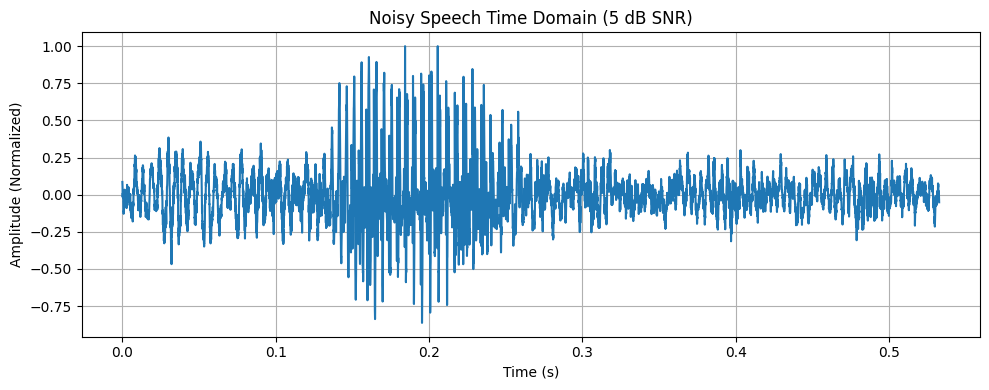

In [30]:
import soundfile as sf
import numpy as np
from pathlib import Path
import sounddevice as sd
import matplotlib.pyplot as plt
import os

SR = 16000
TARGET_SNR_DB = 5

SPEECH_WAV_FILE = Path('/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Vocabulary_16khz/Zack/zack05.wav')
NOISE_FILE = Path('/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/noise.wav')
OUTPUT_DIR = Path('/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Noise mitigated'); OUTPUT_DIR.mkdir(exist_ok=True)

speech, fs = sf.read(SPEECH_WAV_FILE, dtype='float32')
noise, fs_noise = sf.read(NOISE_FILE, dtype='float32')

# Mandatory check: Sample Rate (SR) consistency
if fs != fs_noise: raise ValueError("SR mismatch.")

L_speech = len(speech)

# Tile noise to match speech length
noise = np.tile(noise, int(np.ceil(L_speech / len(noise))))[:L_speech]

# Generalized Channel Matching
if speech.ndim == 1 and noise.ndim == 1:
    pass # Both mono
elif speech.ndim > 1 and noise.ndim == 1:
    # Speech is multi-channel, noise is mono. Tile noise to match channels.
    num_channels = speech.shape[1]
    noise = np.tile(noise[:, np.newaxis], (1, num_channels))
elif speech.ndim == 1 and noise.ndim > 1:
    # Mono speech, multi-channel noise. Use only first noise channel for mixing.
    noise = noise[:, 0]

# Final safety measure: match the shorter length
min_len = min(len(speech), len(noise))
speech = speech[:min_len]
noise = noise[:min_len]
# ----------------------------------------

# Calculate scaling factor to achieve TARGET_SNR_DB
speech_pwr = np.sum(speech**2)
noise_pwr = np.sum(noise**2)
current_snr_db = 10 * np.log10(speech_pwr / noise_pwr) if noise_pwr > 0 else 999
noise_scale = 10**((current_snr_db - TARGET_SNR_DB) / 20)

# Mix, Normalize, and Save
noisy_speech = speech + noise * noise_scale
noisy_speech /= np.max(np.abs(noisy_speech)) # Normalize to avoid clipping

# Derive base file name and create output paths
base_name = SPEECH_WAV_FILE.stem

output_path_npy = OUTPUT_DIR / f'noisy_{base_name}_{TARGET_SNR_DB}dB.npy'
np.save(output_path_npy, noisy_speech)

output_path_wav = OUTPUT_DIR / f'noisy_{base_name}_{TARGET_SNR_DB}dB.wav'
sf.write(output_path_wav, noisy_speech, fs)

print(f"\nProcessing Complete.")
print(f"Noisy audio created at {TARGET_SNR_DB}dB SNR.")
print(f"Noisy audio saved to: \033[92m{output_path_wav}\033[0m")
print(f"Noisy features saved to: \033[92m{output_path_npy}\033[0m")

print("\n--- Playback ---")
print("Playing the noisy signal now...")
sd.play(noisy_speech, fs)
sd.wait()
print("Playback finished.")

print("\n--- Generating Plot ---")

# Create a single subplot figure for the time domain signal
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

# Time Domain Plot (Noisy Signal)
time_axis = np.linspace(0, len(noisy_speech) / SR, len(noisy_speech))
ax.plot(time_axis, noisy_speech)
ax.set_title(f'Noisy Speech Time Domain ({TARGET_SNR_DB} dB SNR)')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude (Normalized)')
ax.grid(True)

plt.tight_layout()
plt.show()

# Testing

Less confidence output scores in noisy test files

In [16]:
import tensorflow as tf
import numpy as np
import librosa
import pickle
from pathlib import Path
import os
import warnings
import sys 
import soundfile as sf # NEW: For loading audio data
import sounddevice as sd # NEW: For playing audio

# Suppress TensorFlow and Scikit-learn warnings for cleaner output
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

# --- CONFIGURATION ---

# 1. Path to your trained assets folder (must exist)
OUTPUT_DIR = Path('/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Trained models/')

# 2. File paths of the saved assets
MODEL_SAVE_PATH = OUTPUT_DIR / 'best_speaker_id_model_improved.keras'
SCALER_SAVE_PATH = OUTPUT_DIR / 'scaler_39features.pkl'
ENCODER_SAVE_PATH = OUTPUT_DIR / 'label_encoder.pkl'

# 3. Path to the audio file you want to test
TEST_AUDIO_FILE_PATH = '/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Testing speech/kira.wav' 

# 4. Feature and sequence settings MUST match training
TARGET_SR = 16000 
N_MFCC = 40 
MAX_SEQ_LEN = 300 

# --- 1. MODEL AND ASSET LOADING ---

print("### Loading Model and Preprocessing Assets ###")

# Check for existence before loading
if not MODEL_SAVE_PATH.exists():
    print(f"Error: Model not found at: {MODEL_SAVE_PATH}")
    sys.exit(1)
if not SCALER_SAVE_PATH.exists():
    print(f"Error: Scaler not found at: {SCALER_SAVE_PATH}")
    sys.exit(1)
if not ENCODER_SAVE_PATH.exists():
    print(f"Error: Encoder not found at: {ENCODER_SAVE_PATH}")
    sys.exit(1)
if not Path(TEST_AUDIO_FILE_PATH).exists():
    print(f"Error: Test audio file not found at: {TEST_AUDIO_FILE_PATH}")
    sys.exit(1)


# Load assets
model = tf.keras.models.load_model(MODEL_SAVE_PATH)
with open(SCALER_SAVE_PATH, 'rb') as f:
    scaler = pickle.load(f)
with open(ENCODER_SAVE_PATH, 'rb') as f:
    label_to_index = pickle.load(f)
index_to_label = {v: k for k, v in label_to_index.items()}

print(f"✅ Model, Scaler, and Encoder loaded successfully.")

# -----------------------------------------------------------------------------
# --- 2. FEATURE EXTRACTION FUNCTION ---
# -----------------------------------------------------------------------------

def extract_features_for_prediction(filepath, n_mfcc=N_MFCC, max_len=MAX_SEQ_LEN):
    """
    Extracts features (MFCCs + Delta + Delta-Delta) from a single audio file.
    """
    y, sr = librosa.load(filepath, sr=TARGET_SR)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    delta = librosa.feature.delta(mfcc)
    delta2 = librosa.feature.delta(mfcc, order=2)
    features = np.vstack([mfcc, delta, delta2]).T

    # Padding/Truncation
    if features.shape[0] > max_len:
        features = features[:max_len, :]
    elif features.shape[0] < max_len:
        padding_width = max_len - features.shape[0]
        features = np.pad(features, ((0, padding_width), (0, 0)), mode='constant')
        
    return features.astype('float32') 

# -----------------------------------------------------------------------------
# --- 3. PREDICTION ---
# -----------------------------------------------------------------------------

print("\n### Starting Prediction ###")
print(f"Test File: {TEST_AUDIO_FILE_PATH}")

# 1. Extract features from the test file
features = extract_features_for_prediction(TEST_AUDIO_FILE_PATH)

# 2. Reshape and Scale
features_reshaped = features.reshape(-1, features.shape[-1])
features_scaled = scaler.transform(features_reshaped)
X_test_scaled = features_scaled.reshape(1, features.shape[0], features.shape[1])

# 3. Make prediction
predictions = model.predict(X_test_scaled, verbose=0)[0]
predicted_index = np.argmax(predictions)
confidence = predictions[predicted_index]
predicted_label = index_to_label.get(predicted_index, "UNKNOWN")

# --- Prediction Output ---
print("\n--- Prediction Result ---")
print(f"Predicted Speaker: \033[1m{predicted_label}\033[0m")
print(f"Confidence: {confidence * 100:.2f}%")

# -----------------------------------------------------------------------------
# --- 4. AUDIO PLAYBACK (NEW SECTION) ---
# -----------------------------------------------------------------------------

print("\n\033[96m--- Audio Playback ---\033[0m")

try:
    # Load the audio data and its sample rate using soundfile
    audio_data, fs = sf.read(TEST_AUDIO_FILE_PATH, dtype='float32')

    # Play the audio and wait for it to finish
    sd.play(audio_data, fs)
    sd.wait()  
    print("Playback finished.")

except Exception as e:
    # This might fail if sounddevice setup is incomplete (e.g., missing portaudio)
    print(f"Playback failed: Ensure you have sounddevice dependencies installed (e.g., 'portaudio' on Linux/macOS). Error: {e}")

print("-" * 30)

### Loading Model and Preprocessing Assets ###
✅ Model, Scaler, and Encoder loaded successfully.

### Starting Prediction ###
Test File: /Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Testing speech/kira.wav



--- Prediction Result ---
Predicted Speaker: Imogen
Confidence: 76.98%

--- Audio Playback ---
Playback finished.
------------------------------


Record speech and test

In [19]:
import tensorflow as tf
import numpy as np
import librosa
import pickle
import soundfile as sf
import sounddevice as sd
from pathlib import Path
import os
import sys
import warnings
from datetime import datetime

# Suppress warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

# --- CONFIGURATION ---

# 1. Paths to your trained assets folder (must exist)
OUTPUT_DIR = Path('/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/Trained models/')
RECORDING_DIR = Path('/Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/realtime speech/')
#RECORDING_DIR.mkdir(exist_ok=True, parents=True) # Create the recording folder

# 2. File paths of the saved assets
MODEL_SAVE_PATH = OUTPUT_DIR / 'best_speaker_id_model_improved.keras'
SCALER_SAVE_PATH = OUTPUT_DIR / 'scaler_39features.pkl'
ENCODER_SAVE_PATH = OUTPUT_DIR / 'label_encoder.pkl'

# 3. Recording settings
SAMPLE_RATE = 16000     # Hz (MUST match TARGET_SR)
RECORDING_DURATION = 3  # seconds
CHANNELS = 1

# 4. Feature and sequence settings (MUST match training)
TARGET_SR = 16000 
N_MFCC = 40 
MAX_SEQ_LEN = 300 

# --- 1. MODEL AND ASSET LOADING ---

print("### Loading Model and Preprocessing Assets ###")

# Check for existence before loading
if not all(p.exists() for p in [MODEL_SAVE_PATH, SCALER_SAVE_PATH, ENCODER_SAVE_PATH]):
    print("Error: One or more required files not found. Cannot proceed.")
    sys.exit(1)

# Load assets
model = tf.keras.models.load_model(MODEL_SAVE_PATH)
with open(SCALER_SAVE_PATH, 'rb') as f:
    scaler = pickle.load(f)
with open(ENCODER_SAVE_PATH, 'rb') as f:
    label_to_index = pickle.load(f)
index_to_label = {v: k for k, v in label_to_index.items()}

print(f"✅ Assets loaded successfully. Model ready for {len(index_to_label)} classes.")

# -----------------------------------------------------------------------------
# --- 2. RECORDING FUNCTION ---
# -----------------------------------------------------------------------------

def record_and_save_audio(duration, fs, channels, save_dir):
    """Records audio and saves it to a file, returning the saved path."""
    print(f"\n--- Live Recording Phase (Recording for {duration} seconds) ---")
    
    # Record audio data
    recording = sd.rec(int(duration * fs), samplerate=fs, channels=channels, dtype='float32')
    sd.wait()  # Wait until recording is finished

    # Define the save path
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"realtime_rec_{timestamp}.wav"
    save_path = save_dir / filename
    
    # Save the file
    sf.write(save_path, recording, fs)
    
    print(f"Recording saved successfully to: \033[92m{save_path}\033[0m")
    
    return str(save_path)


# -----------------------------------------------------------------------------
# --- 3. FEATURE EXTRACTION FUNCTION ---
# -----------------------------------------------------------------------------

def extract_features_for_prediction(filepath, n_mfcc=N_MFCC, max_len=MAX_SEQ_LEN):
    """
    Extracts features (MFCCs + Delta + Delta-Delta) from a single audio file.
    """
    y, sr = librosa.load(filepath, sr=TARGET_SR)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    delta = librosa.feature.delta(mfcc)
    delta2 = librosa.feature.delta(mfcc, order=2)
    features = np.vstack([mfcc, delta, delta2]).T

    # Padding/Truncation
    if features.shape[0] > max_len:
        features = features[:max_len, :]
    elif features.shape[0] < max_len:
        padding_width = max_len - features.shape[0]
        features = np.pad(features, ((0, padding_width), (0, 0)), mode='constant')
        
    return features.astype('float32') 

# -----------------------------------------------------------------------------
# --- 4. EXECUTION ---
# -----------------------------------------------------------------------------

# Record the audio and get the saved path
recorded_file_path = record_and_save_audio(RECORDING_DURATION, SAMPLE_RATE, CHANNELS, RECORDING_DIR)

# --- Playback Verification ---
print("\n\033[96m--- Audio Playback ---\033[0m")
audio_data, fs = sf.read(recorded_file_path, dtype='float32')
sd.play(audio_data, fs)
sd.wait()  
print("Playback finished.")

# --- Prediction ---
print("\n### Starting Prediction ###")

# 1. Extract features
features = extract_features_for_prediction(recorded_file_path)

# 2. Reshape and Scale
features_reshaped = features.reshape(-1, features.shape[-1])
features_scaled = scaler.transform(features_reshaped)
X_test_scaled = features_scaled.reshape(1, features.shape[0], features.shape[1])

# 3. Make prediction
predictions = model.predict(X_test_scaled, verbose=0)[0]
predicted_index = np.argmax(predictions)
confidence = predictions[predicted_index]
predicted_label = index_to_label.get(predicted_index, "UNKNOWN")

# --- Prediction Output ---
print("\n--- Live Prediction Result ---")
print(f"Predicted Speaker: \033[1m{predicted_label}\033[0m")
print(f"Confidence: {confidence * 100:.2f}%")
print("-" * 30)

### Loading Model and Preprocessing Assets ###
✅ Assets loaded successfully. Model ready for 21 classes.

--- Live Recording Phase (Recording for 3 seconds) ---
Recording saved successfully to: /Users/sudiptogoldfish/code files/CMP7016A LAB/CW1/realtime speech/realtime_rec_20251209_223240.wav

--- Audio Playback ---
Playback finished.

### Starting Prediction ###

--- Live Prediction Result ---
Predicted Speaker: Ahmed
Confidence: 73.00%
------------------------------
